In [1]:
import numpy as np     # to perform a wide variety of mathematical operations on arrays
import pandas as pd       # allows us to analyze big data and make conclusions based on statistical theories
import matplotlib.pyplot as plt     # used for data visualization
import seaborn as sns      # It helps you explore and understand your data
import re   #A regular expression is an expression that holds a defined search pattern to extract the pattern-specific strings
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error       #importing some metrics
from sklearn.model_selection import train_test_split       # used for splitting the data
from sklearn.linear_model import LinearRegression        #choose linear regression model

# Data Exploration

### Creating a DataFrame

In [3]:
df = pd.read_csv("housing.csv")          # Load the data into 'df'

# EDA - Exploratory Data Analysis

In [4]:
df.head()       # It gives top 5 rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PITRATIO,B,LSTAT,PRICE
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [5]:
#Columns Informations

#- CRIM per capita crime rate by town
#- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
#- INDUS proportion of non-retail business acres per town
#- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#- NOX nitric oxides concentration (parts per 10 million)
#- RM average number of rooms per dwelling
#- AGE proportion of owner-occupied units built prior to 1940
#- DIS weighted distances to five Boston employment centres
#- RAD index of accessibility to radial highways
#- TAX full-value property-tax rate per 10,000usd
#- PTRATIO pupil-teacher ratio by town
#- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#- LSTAT % lower status of the population

In [6]:
df.tail()               # It gives last 5 rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PITRATIO,B,LSTAT,PRICE
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
504,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [7]:
df.shape       # It gives row * column

(505, 14)

In [8]:
df.columns       # It gives all columns data

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PITRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [9]:
df.dtypes        #It returns the data types

CRIM        float64
ZN          float64
INDUS       float64
CHAS          int64
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD           int64
TAX           int64
PITRATIO    float64
B           float64
LSTAT       float64
PRICE       float64
dtype: object

In [10]:
df.nunique()         # It returns the number of unique values for each column

CRIM        503
ZN           25
INDUS        75
CHAS          2
NOX          81
RM          445
AGE         356
DIS         411
RAD           9
TAX          66
PITRATIO     46
B           357
LSTAT       454
PRICE       229
dtype: int64

In [11]:
df.isnull()           # It detect the missing values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PITRATIO,B,LSTAT,PRICE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,False,False,False,False,False,False,False,False,False,False,False,False,False,False
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()          # It all number of null values
                          # but in this dataset there is no null value

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PITRATIO    0
B           0
LSTAT       0
PRICE       0
dtype: int64

In [13]:
df.describe()         # generate descriptive statistics of the data in a Pandas DataFrame or Series

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PITRATIO,B,LSTAT,PRICE
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
df.corr           # calculates the relationship between each column in your data set.

<bound method DataFrame.corr of         CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.02731  0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
1    0.02729  0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
2    0.03237  0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3    0.06905  0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4    0.02985  0.0   2.18     0  0.458  6.430  58.7  6.0622    3  222   
..       ...  ...    ...   ...    ...    ...   ...     ...  ...  ...   
500  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
501  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
502  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
503  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
504  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PITRATIO       B  LSTAT  PRICE  
0        17.8  396.90   9.14   21.6  
1        17.8  392.83   4.0

<AxesSubplot:>

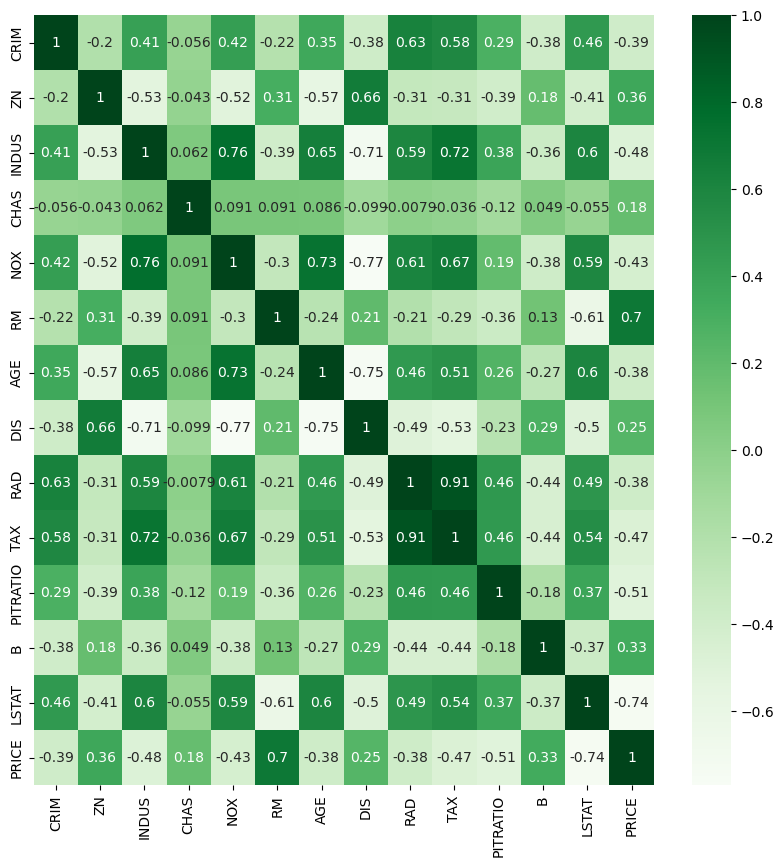

In [15]:
plt.figure(figsize=(10,10))              
sns.heatmap(data=df.corr(),annot=True,cmap='Greens')     # It is used to visualize the strength of correlation among variables

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


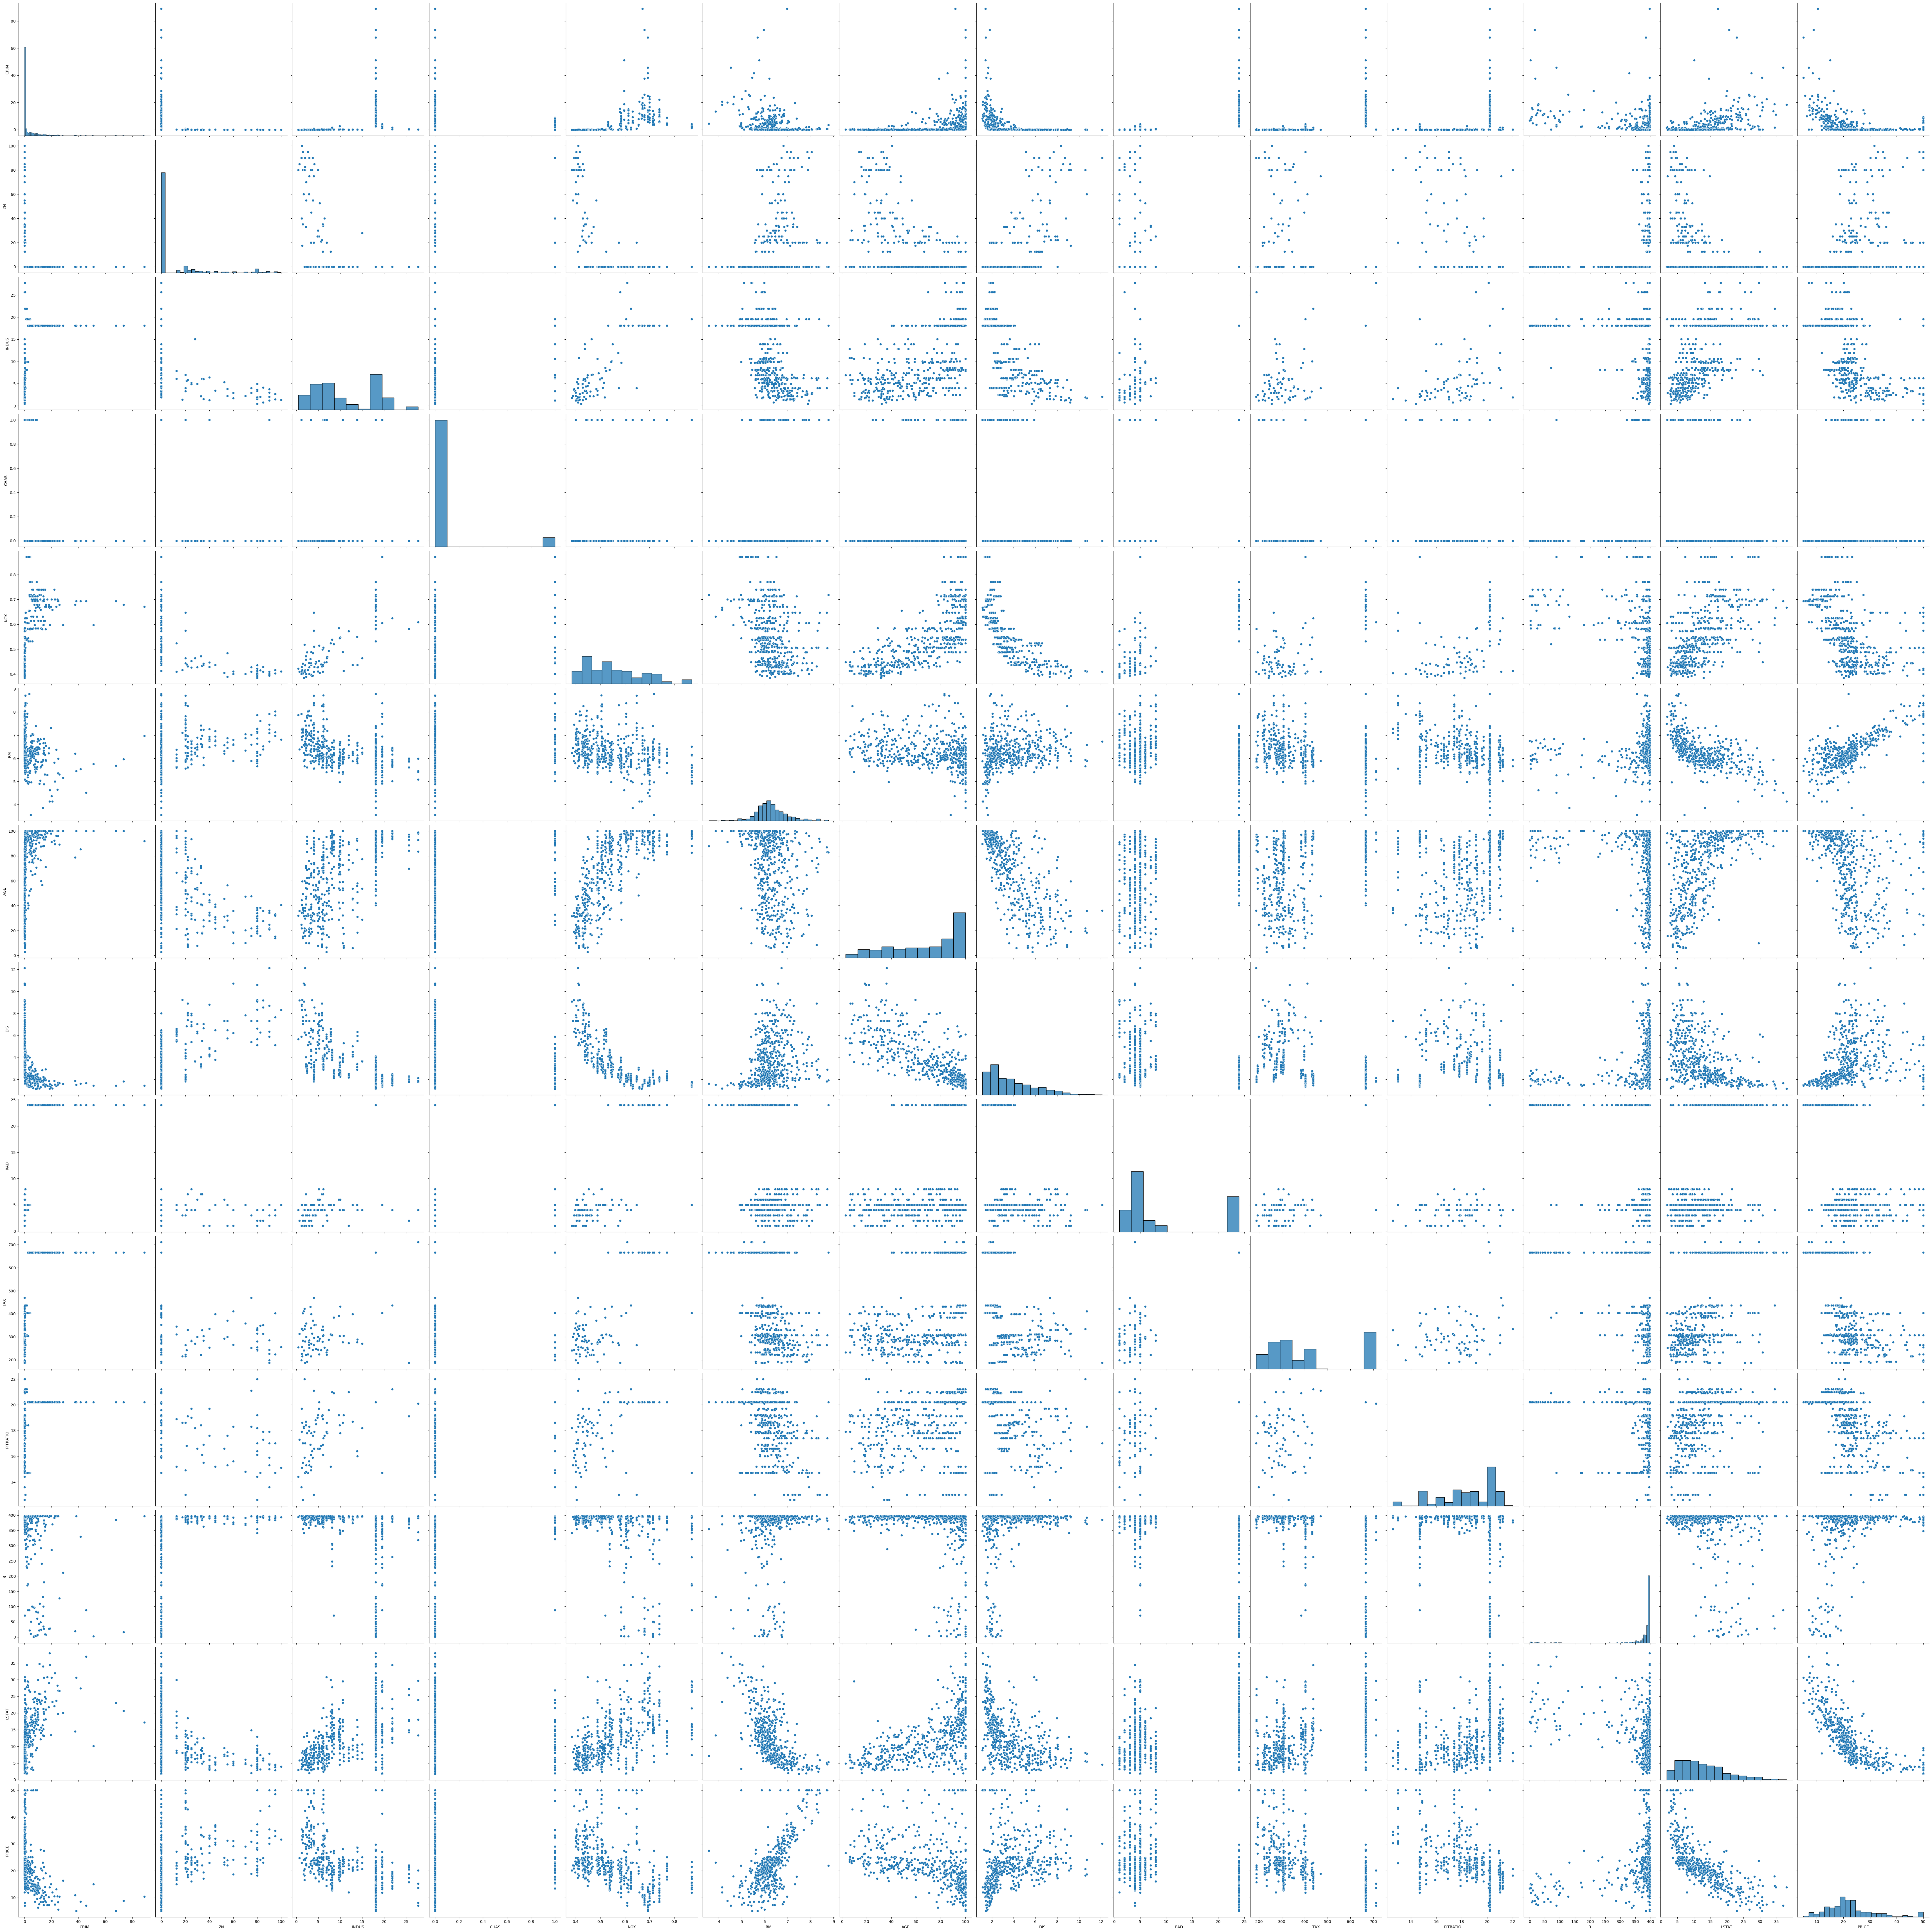

In [16]:
sns.pairplot(df,size=5)          # To explain a relationship between two variables or to form the most separated clusters

<AxesSubplot:>

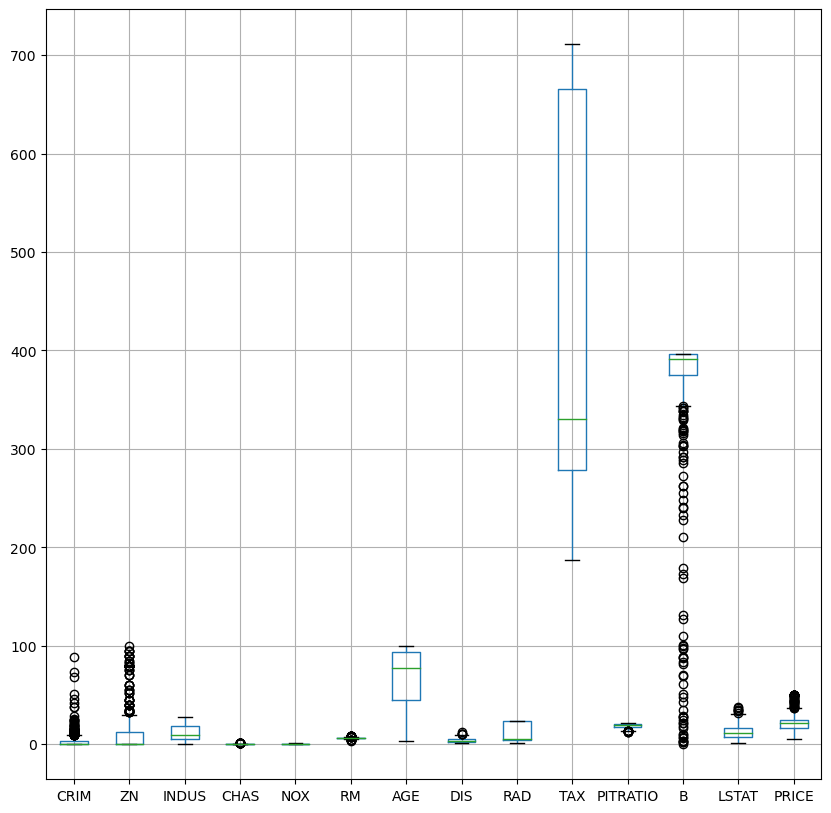

In [17]:
plt.figure(figsize=(10,10))     #plot a Boxplot
df.boxplot()       # To show distributions of numeric data values, especially when you want to compare them between multiple groups

In [18]:
df.PRICE.min()      # Minimum Price

5.0

In [19]:
df.PRICE.max()           # Maximum Price

50.0

In [20]:
df.PRICE.std()           #standard Deviation

9.20599124438888

# Now we start machine learning

In [21]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PITRATIO,B,LSTAT,PRICE
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [22]:
X = np.array(df.drop('PRICE',axis=1))
y = np.array(df.PRICE)

# Splitting the data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2
                                                    , random_state=42)  # train_test_split is used to split the data

In [24]:
len(X_train)          # len() function - is used to returns the maximum length

404

In [25]:
len(y_train)

404

In [26]:
len(X_test)

101

In [27]:
len(y_test)

101

# choosing the model

In [28]:
model = LinearRegression()    # linear Regression describe the relationship between one dependent variable 
                              # w.r.t. one or more independent variable

In [29]:
model.fit(X_train,y_train)         # then we need to fit the model

LinearRegression()

In [30]:
model.intercept_        # gives the intercept

34.56075241385146

In [31]:
model.coef_         # gives the coefficient

array([-9.86419414e-02,  3.55088661e-02,  2.01858184e-02,  2.48715542e+00,
       -1.80404571e+01,  4.08855060e+00,  8.37000947e-03, -1.46405699e+00,
        2.96233583e-01, -1.14529048e-02, -1.00176249e+00,  1.20647494e-02,
       -5.54132250e-01])

# Prediction

In [32]:
y_test

array([22.6, 32. , 13.6, 23.4, 33.4, 20.8, 12. , 14.4, 19.6, 16.8, 23. ,
       15. , 23.7, 20.3, 18.5, 21.6, 21.4,  7.2, 33.3, 14.1, 24.4, 35.1,
       14.5, 22.4, 14.2, 11.8, 28. , 21. , 19.3, 18.3, 23.6, 14.9, 15. ,
       22.6, 23.1, 17. , 33.4, 19.5, 20. , 24.1, 19.7, 16.1, 22.6, 20.9,
       22. , 24.8, 13.5, 21.7, 19.9, 21.6, 21.7, 46. , 14.5, 18.6, 20.7,
       21.2, 18.4, 37.3, 26.6, 24.3, 33. , 24.7, 24.3, 18.2, 17.2, 21.7,
       13.1, 22.9, 34.9, 12.7, 16.6, 16.3, 16.2, 20.6, 21.2,  5. , 19.5,
       50. , 10.9,  7. , 24.2, 17.2, 44. ,  9.7, 19.4, 24. , 13.8, 25. ,
       20.6, 13.3, 24.6, 18.5, 23. , 23.9, 27.5, 18.4, 19.4, 17.9, 22. ,
       22.9, 22.2])

In [33]:
y_pred = model.predict(X_test)           # gives prediction by analyzing X_test

In [34]:
y_pred

array([26.87187901, 33.95259383, 14.27729131, 23.98322578, 35.95742085,
       23.59338056, 11.45119102,  3.49825392, 23.50367023, 20.74508931,
       30.12367386, 19.35431681, 27.81203485, 22.58392373, 19.60816344,
       26.09430947, 22.62072301,  7.90998859, 36.24762963, 17.93417496,
       28.69973862, 35.62637738, 18.38705802, 23.86696016, 18.29629262,
       11.29230272, 28.52474824, 21.52327248, 16.73324359, 19.26182962,
       29.71864667, 14.72492792, 26.26587641, 19.55055133, 16.56855169,
       22.52575438, 29.20381305, 20.1340254 , 16.78319027, 25.59907518,
       13.86388974, 18.93047543, 22.58007132, 20.77788834, 27.95563196,
       30.80686219, 13.44713264, 21.62082741, 20.51783332, 25.59387982,
       20.82289386, 40.83397638, 13.90569531, 19.3676049 , 25.36183096,
       22.51566284, 19.17300731, 34.0055645 , 28.26691162, 19.91463276,
       23.80735169, 24.40855982, 24.72109385, 18.48423973, 16.49866211,
       22.43932342, 20.81045213, 25.04049947, 33.84773348, 11.83

# Checking Score and Model Performance

In [35]:
model.score(X_test,y_test)

0.6522201888666141

In [36]:
r2_score(y_test,y_pred)               # R squared

0.6522201888666141

In [37]:
mean_squared_error(y_test,y_pred)                    #MSE

19.37904111613709

In [38]:
mean_absolute_error(y_test,y_pred)                #MAE

3.1867873980181187

In [39]:
np.sqrt(mean_squared_error(y_test,y_pred))

4.402163231428054

Text(0.5, 1.0, 'Actual Price V/s Predicted Price')

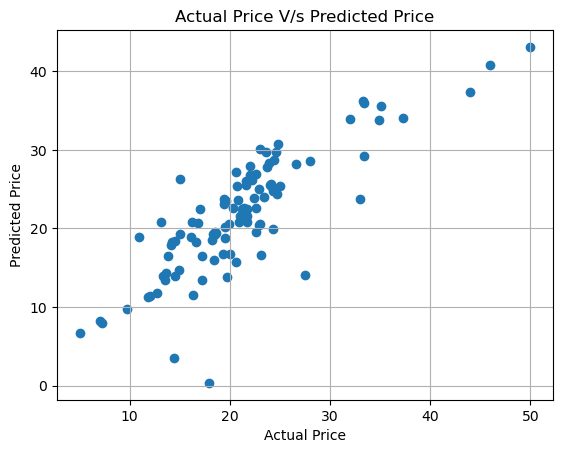

In [40]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid()
plt.title('Actual Price V/s Predicted Price')

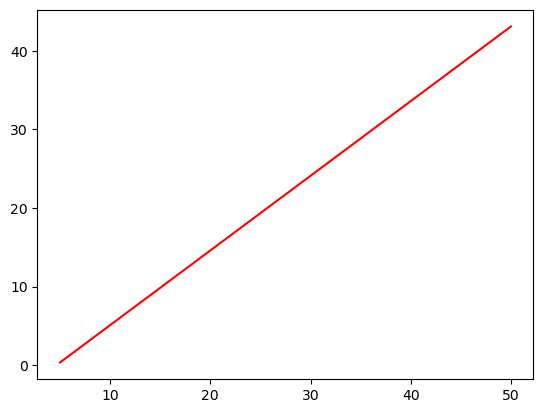

In [41]:
plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)], color='red')

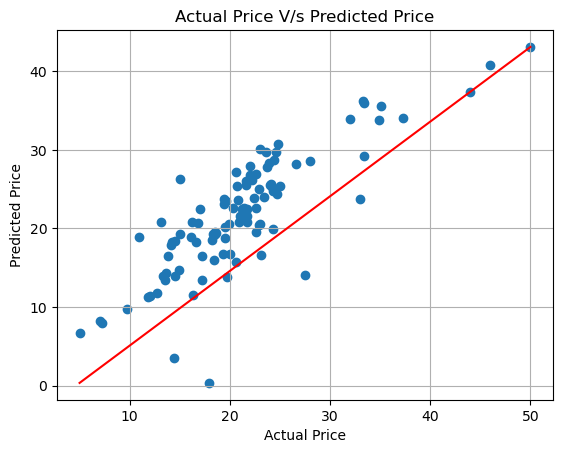

In [42]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid()
plt.title('Actual Price V/s Predicted Price')
plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)], color='red')